In [14]:
from wand.image import Image as WImage

# Лабораторная работа 3. Итеративные и рекурсивные алгоритмы

**Цель работы:** изучить рекурсивные алгоритмы и рекурсивные структуры данных; научиться проводить анализ итеративных и рекурсивных процедур; исследовать эффективность итеративных и  рекурсивных процедур при реализации на ПЭВМ.


## Задание 1
Реализация рекурсивного алгоритма вычисления суммы $n$ первых членов ряда
$$x + \cfrac{x^3}{2!} + \cfrac{x^5}{3!} + \cfrac{x^7}{4!} + \cdots + \cfrac{x^{2n-1}}{n!} + \cdots $$

In [1]:
def r_factorial(x):
    if x < 0:
        raise Exception('Factorial error')
    if x == 0 or x == 1:
        return 1
    return x * r_factorial(x - 1)

In [2]:
def r_partial_sum(x, n: int):
    if n < 0:
        raise Exception('Argument must define number of elements, which include partial sum!')
    if n == 0:
        return 0
    elem = pow(x, 2*n-1)/r_factorial(n)
    return elem + r_partial_sum(x, n - 1)

r_partial_sum(1, 3)

1.6666666666666667

## Задание 2
Реализация без использования рекурсии (иетративная реализация)

In [3]:
def factorial(x):
    res = 1
    for i in range(x):
        res *= x - i
    return res

In [4]:
def partial_sum(x, n: int):
    if n < 0:
        raise Exception('Argument must define number of elements, which include partial sum!')
    if n == 0:
        return 0
    res = 0
    for i in range(1, n+1):
        res += pow(x, 2*i-1)/factorial(i)
    return res

partial_sum(1, 3)

1.6666666666666667

## Задание 3
Блок схема рекурсивной реализации

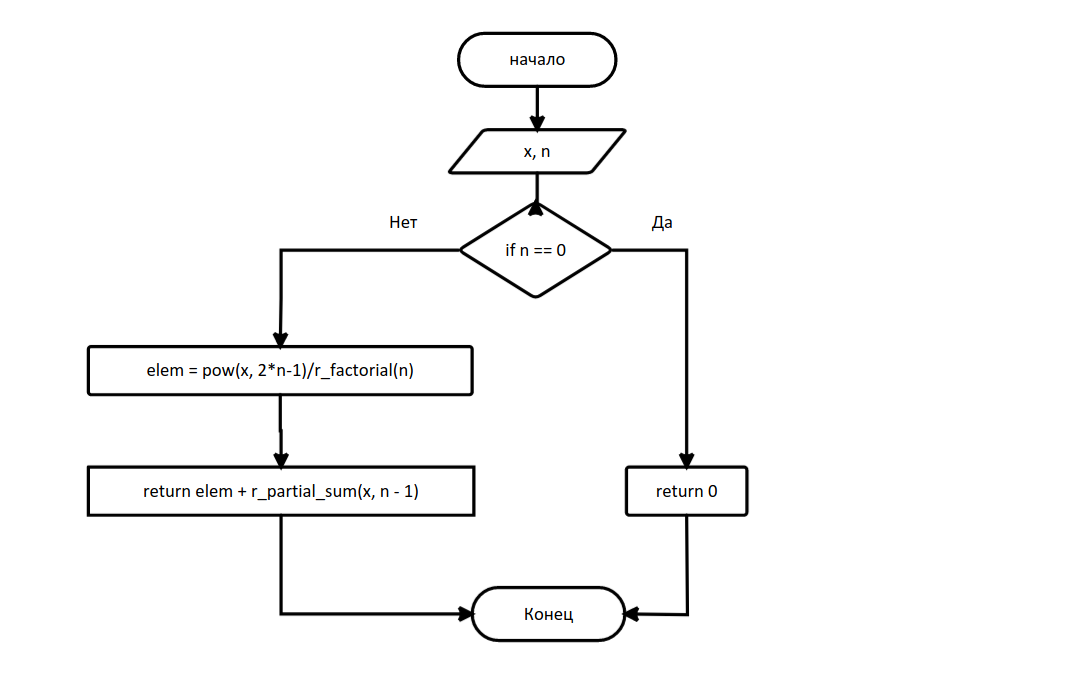

In [20]:
img = WImage(filename='1.png')
img

Блок схема итеративной реализации

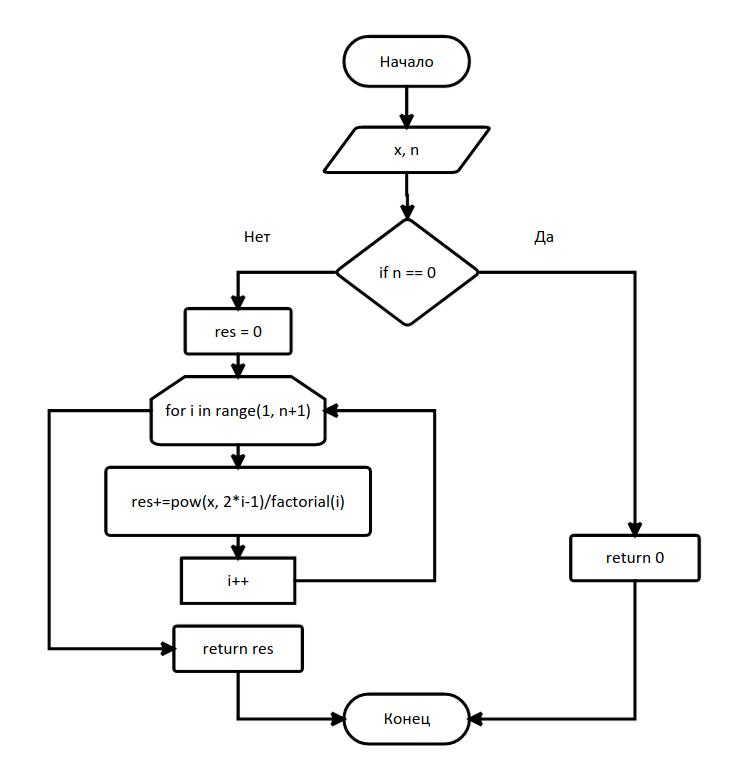

In [21]:
img = WImage(filename='2.png')
img

Верхняя граница размерности, для которой при рекурсивной реализации не происходит stack overflow

In [13]:
import sys


print("Maximum deps of reqursuon:", sys.getrecursionlimit())

Maximum deps of reqursuon: 3000


Встроенная мемоизация в рекурсивной реализации (сохранение промежуточных значений вызова рекурсии)

In [88]:
cache = {}
def r_partial_sum(x, n: int):
    if n < 0:
        raise Exception('Argument must define number of elements, which include partial sum!')
    if n == 0:
        return 0
    if (x, n) not in cache:
        cache[(x, n)] = pow(x, 2*n-1)/r_factorial(n)
    elem = cache[(x, n)]
    return elem + r_partial_sum(x, n - 1)

r_partial_sum(1, 3)

1.6666666666666667

Но использование глобальных переменных не рекомендуется, поэтому замкнем лексическое окружение функции, которое будет хранить промежуточне значения вызова рекурсии с помощью декоратора @memoized

In [90]:
from functools import wraps


def memoized(f):
    cache = {}
    @wraps(f)
    def wrap(*args):
        if args not in cache:
            cache[args] = f(*args)
        return cache[args]
    return wrap


@memoized
def r_partial_sum(x, n: int):
    if n < 0:
        raise Exception('Argument must define number of elements, which include partial sum!')
    if n == 0:
        return 0
    elem = pow(x, 2*n-1)/r_factorial(n)
    return elem + r_partial_sum(x, n - 1)

r_partial_sum(1, 3)

1.6666666666666667

Сравнение производительности реализованных алгоритмов.

In [12]:
from datetime import datetime


start = datetime.now()
r_partial_sum(1, 2800)
stop = datetime.now()
delta = stop - start
print(delta)

start = datetime.now()
partial_sum(1, 2800)
stop = datetime.now()
delta = stop - start
print(delta)

print("В данном случае количество рекурсий и итераций равны между собой и для оценки производительности не имеют значения")

0:00:01.126544
0:00:00.959948
В данном случае количество рекурсий и итераций равны между собой и для оценки производительности не имеют значения


Вывод: рекурсивные алгоритмы работают дольше итеративных и имеют ограничение по глубине рекурсии. Одним из преимуществ рекурсивного подхода является быстрота написания кода и его компактность, но при этом иногда возрастает когнетивная сложность кода (не всегда). Таким образом для оптимизации рекурсивные алгоритмы стоит почти всегда заменять итеративными,в случае если это возможно.